In [ ]:
#The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. 
#The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import backend
import tensorflow as  tf

# Model architecture
from sklearn.model_selection import train_test_split

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Progressor
#from tqdm import tqdm
#import h5py


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [28]:
y_train[0:1]

array([[6]], dtype=uint8)

In [ ]:
type(y_train)

In [53]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X_train,y_train, test_size=0.2, random_state=1,stratify=y_train)
#y_train1, y_test1  = train_test_split( y_train, test_size=0.20 ,stratify=y_train)

In [ ]:
# splitting the data without strified sampling means each classes wont be equaly distributed 
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]
#X_train1= X_train[:40000,:]
#X_test1 = X_train[-10000:,:]

In [8]:
# summarize loaded dataset
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('X_train1: X=%s, y=%s' % (X_train1.shape, y_train1.shape))
print('X_test1: X=%s, y=%s' % (X_test1.shape, y_test1.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_train1: X=(40000, 32, 32, 3), y=(40000, 1)
X_test1: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
# few image trying to display from array of image and picture clarity etc.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train1[i][0]])
plt.show()

In [ ]:
# checking if label are in number or in binary format.
y_test[0:2]

In [ ]:
# plot first few images
for i in range(5):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train1[i])
# show the figure
plt.show()

In [ ]:
# normalize pixel values
#X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
# Function to reshape and scaling image
def Scale_Reshape(x):
    x_min = x.min(axis=(1, 2), keepdims=True)
    x_max = x.max(axis=(1, 2), keepdims=True)

    x = (x - x_min)/(x_max-x_min)
    
    x = x.reshape(-1, 32, 32, 3)
    return x

In [ ]:
# Training data processing
#X_train1_scale = Scale_Reshape(X_train1)

# Test data processing 
#X_test1_scale = Scale_Reshape(X_test1)
#  actual test data scaling
# Test data processing 
#X_test_scale = Scale_Reshape(X_test)

In [ ]:
# Show the histogram showing the frequency of data point in each class
# it shows in training set each class having 5k images  and test each class having 1k 
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train1.ravel(), ax=axs[0])
axs[0].set_title('frequency of data point in each class in train1')
axs[0].set_xlabel('Classes')

sns.countplot(y_test1.ravel(), ax=axs[1])
axs[1].set_title('frequency of data point in each class in test1')
axs[1].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[2])
axs[2].set_title('frequency of data point in each class in actual test')
axs[2].set_xlabel('Classes')

In [54]:
# normalize pixel values for validation dataset and train1 dataset
X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0

In [55]:
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

In [56]:
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [57]:
# plot loss and accuracy during training
# plot loss during training
def plotmodel(hist): 
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation dataset')
    plt.legend()
# plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation dataset')
    plt.legend()
    plt.show()

In [ ]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 20%.
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.
def dfmodel():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#Compile and train the model  without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

In [58]:
#net is learning with 32 convolutional filters, each of which with a 3 x 3 size. 
#activation is relu and we have a max-pooling operation with pool size 2 x 2 and a dropout at 20%.
# Add Dense layers on top
# CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs,drop out  and a softmax activation.
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#Compile and train the model  without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [36]:
number_of_round=35 ,
#batch_size = 32
model.save_weights('model.h5')

In [37]:
# training over the train dataset and doing validation against validation 0.1 

#history = model.fit(X_train1, y_train1, epochs = 40, shuffle = True, batch_size = 64,
#                    validation_data=(X_test1, y_test1))
history = model.fit(X_train1, y_train1, epochs = 5,shuffle = True, batch_size = 32,
                     validation_split = 0.1)

Epoch 1/5
1125/1125 [==============================] - 19s 16ms/step - loss: 1.6459 - accuracy: 0.3949 - val_loss: 1.2983 - val_accuracy: 0.5222
Epoch 2/5
1125/1125 [==============================] - 18s 16ms/step - loss: 1.2042 - accuracy: 0.5651 - val_loss: 1.0887 - val_accuracy: 0.6122
Epoch 3/5
1125/1125 [==============================] - 18s 16ms/step - loss: 1.0404 - accuracy: 0.6271 - val_loss: 0.9647 - val_accuracy: 0.6515
Epoch 4/5
1125/1125 [==============================] - 18s 16ms/step - loss: 0.9186 - accuracy: 0.6714 - val_loss: 0.9084 - val_accuracy: 0.6718
Epoch 5/5
1125/1125 [==============================] - 18s 16ms/step - loss: 0.8454 - accuracy: 0.6992 - val_loss: 0.8398 - val_accuracy: 0.7017


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


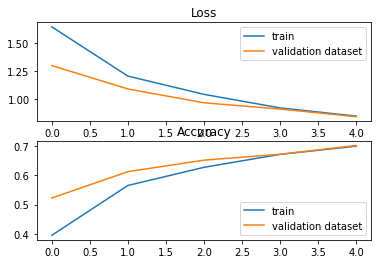

In [38]:
# printing , below graph shows loss and accuracy for train and validation dataset 
print(history.history.keys())

plotmodel(history)

In [39]:
model.load_weights('model.h5')

In [40]:
# with test1 dataset 

history = model.fit(X_train1, y_train1, epochs = 10, shuffle = True, batch_size = 32,
                   validation_data=(X_test1, y_test1))

Epoch 1/10
1250/1250 [==============================] - 22s 18ms/step - loss: 1.7500 - accuracy: 0.3501 - val_loss: 1.4544 - val_accuracy: 0.4672
Epoch 2/10
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2991 - accuracy: 0.5284 - val_loss: 1.2053 - val_accuracy: 0.5767
Epoch 3/10
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0726 - accuracy: 0.6172 - val_loss: 0.9863 - val_accuracy: 0.6515
Epoch 4/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9553 - accuracy: 0.6589 - val_loss: 0.8958 - val_accuracy: 0.6832
Epoch 5/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.8591 - accuracy: 0.6956 - val_loss: 0.8198 - val_accuracy: 0.7099
Epoch 6/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7892 - accuracy: 0.7199 - val_loss: 0.8069 - val_accuracy: 0.7153
Epoch 7/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.7274 - accuracy: 0.7440 - val_loss: 0.7482 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


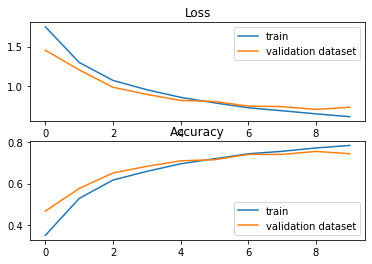

In [41]:
# printing , below graph shows loss and accuracy for train and test1 dataset 
print(history.history.keys())

plotmodel(history)

In [42]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

313/313 - 2s - loss: 0.7341 - accuracy: 0.7443


In [43]:
predicted_classes = model.predict_classes(X_test1) 
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([8, 8, 8, ..., 3, 0, 9])

In [49]:
model.load_weights('model.h5')

In [59]:
# with actual test dataset 

history = model.fit(X_train1, y_train1, epochs = 5, shuffle = True, batch_size = 32,
                   validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 22s 17ms/step - loss: 1.6131 - accuracy: 0.4040 - val_loss: 1.2420 - val_accuracy: 0.5459
Epoch 2/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1563 - accuracy: 0.5880 - val_loss: 1.0789 - val_accuracy: 0.6108
Epoch 3/5
1250/1250 [==============================] - 21s 17ms/step - loss: 0.9929 - accuracy: 0.6483 - val_loss: 0.9538 - val_accuracy: 0.6681
Epoch 4/5
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8864 - accuracy: 0.6851 - val_loss: 0.8427 - val_accuracy: 0.7051
Epoch 5/5
1250/1250 [==============================] - 21s 17ms/step - loss: 0.8083 - accuracy: 0.7144 - val_loss: 0.8507 - val_accuracy: 0.7040


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


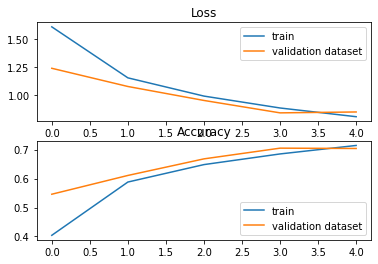

In [60]:
# printing , below graph shows loss and accuracy for train and test dataset 
print(history.history.keys())

plotmodel(history)

In [ ]:
# Evaluate the model
test_loss1, test_acc1 = model.evaluate(X_test1,  y_test1, verbose=2)

In [ ]:
predicted_classes = model.predict_classes(X_test1) 
predicted_classes

In [ ]:
#before going for image augmentation , again retraining the madel with its intial value 

In [63]:
# loading the dataset 
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_train = X_train.astype('float32')
X_train =  X_train / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
#Compile and train the model  without any image augmentation
#opt = SGD(lr=0.01, momentum=0.9)
#optimizer=opt
model.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])
model.save_weights('model.h5')



In [ ]:
# MODEL Training using data augmentaion 

In [64]:
# generating more data using the existing data
#Randomly Zoom by 10% some training images
#Randomly shift images horizontally by 10% of the width
#Randomly shift images vertically by 10% of the height
#Randomly flip images horizontally.
#from tf.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zca_epsilon=0,
                            #width_shift_range = 0.1,
                            horizontal_flip = True,
                            fill_mode='reflect',
                            )
    


In [ ]:
#test_generator = ImageDataGenerator(zca_epsilon=0,
                               horizontal_flip=True,
                               fill_mode='reflect',)
#test_generator.fit(X_test1, seed=0, augment=True)

In [65]:
# retraining the model with image genearator

#history = model.fit_generator(datagen.flow(X_train1, y_train1, batch_size = 32), epochs = 10, validation_data=(X_test1, y_test1))
#                                    workers=4)
# get batch iterator for training
train_iterator = datagen.flow(X_train, y_train)
# get batch iterator for test
val_iterator = datagen.flow(X_test, y_test)
# fit model
history = model.fit_generator(train_iterator, validation_data=val_iterator, epochs = 30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6015 - accuracy: 0.4097 - val_loss: 1.2215 - val_accuracy: 0.5580
Epoch 2/30
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1680 - accuracy: 0.5829 - val_loss: 1.0236 - val_accuracy: 0.6322
Epoch 3/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9900 - accuracy: 0.6521 - val_loss: 0.9038 - val_accuracy: 0.6826
Epoch 4/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8852 - accuracy: 0.6897 - val_loss: 0.8166 - val_accuracy: 0.7161
Epoch 5/30
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8244 - accuracy: 0.7127 - val_loss: 0.7543 - val_accuracy: 0.7409
Epoch 6/30
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7727 - accuracy: 0.7306 - val_loss: 0.7621 - val_accuracy: 0.7397
Epoch 7/30
1563/1563 [==========================

KeyboardInterrupt: ignored

In [67]:
# Evaluate the model for test data
#test_loss, test_acc = model.evaluate(X_test1,  y_test1, verbose=2)
# get batch iterator for testing
#test_iterator = datagen.flow(X_test, y_test)
# evaluate model loss on test dataset
test_loss, test_acc = model.evaluate_generator(val_iterator, verbose=2)

Instructions for updating:
Please use Model.evaluate, which supports generators.
313/313 - 2s - loss: 0.6730 - accuracy: 0.7729


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


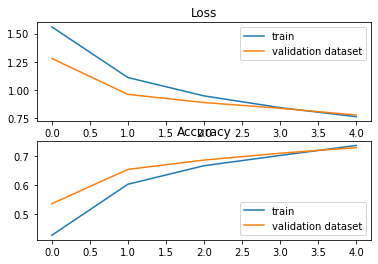

In [68]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())
plotmodel(history)

In [69]:
# Evaluate the model for test data

predicted_classes = model.predict_classes(X_test) 
predicted_classes


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# confusion matrix for all the 10 classes 
